# CS 356 Lab 0: Python Data Practice


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/defreez/cs356-notebooks/blob/main/notebooks/lab0.ipynb)

## Part 1: Python Exercises

Some questions from the Kaggle tutorials, some not.
Fix all the cells so that they match up with the comments.

When you are done, share the Colab notebook with me and submit the Moodle assignment with a link to your notebook.

In [ ]:
# 1.1
# Create a variable called x that contains the floating point value 42.0
x = 42.0

In [ ]:
# 1.2
# Define a function called swap_ht that swaps the first and last elements of a list in place.
# If the list has fewer than two elements, leave it unchanged.
# You must use negative indexing.
def swap_ht(a):

  #leave unchanged
  if len(a) < 2:
    return

  #swap
  temp = a[0]
  a[0] = a[-1]
  a[-1] = temp

b = [1,2,3]
swap_ht(b) 
b

[3, 2, 1]

In [ ]:
# 1.3 Fix the function below.
def has_lucky_number(nums):
    """Return whether the given list of numbers is lucky. A lucky list contains
    at least one number divisible by 7.
    """
    for num in nums:
        if num % 7 == 0:
            return True
  
    return False

In [ ]:
#Look at the Python expression below. What do you think we'll get when we run it? When you've made your prediction, uncomment the code and run the cell to see if you were right.
#Recomment the code when you are finished so that the notebook will run cleanly.

#This won't work.

#[1, 2, 3, 4] > 2

In [ ]:
# 1.4
# R and Python have some libraries (like numpy and pandas) compare each element of the list to 2 (i.e. do an 'element-wise' comparison) and give us a list of booleans like [False, False, True, True].
# Implement a function that reproduces this behaviour, returning a list of booleans corresponding to whether the corresponding element is greater than n.

def elementwise_greater_than(L, thresh):
    """Return a list with the same length as L, where the value at index i is 
    True if L[i] is greater than thresh, and False otherwise.
    
    >>> elementwise_greater_than([1, 2, 3, 4], 2)
    [False, False, True, True]
    """

    return [x > thresh for x in L]

print(elementwise_greater_than([1, 2, 3, 4], 2))

[False, False, True, True]


In [ ]:
import numpy as np

In [ ]:
# 1.5 Use numpy stack and reshape to create an array with shape (3, 6) from a, b, c.
# Do this by converting each (2, 3) array into an an array of shape (6,).
# This process of converting a rank-2 array (matrix) into a rank-1 array (vector) is a common task
# when working with images.
a = [[1.0, 1.1, 1.2], [1.3, 1.4, 1.5]]
b = [[2.0, 2.1, 2.2], [2.3, 2.4, 2.5]]
c = [[3.0, 3.1, 3.2], [3.3, 3.4, 3.5]]

#array of flattened arrays
newArray = [np.array(m).flatten() for m in (a,b,c)]
#stack around axis 0
newArray = np.stack(newArray)

print(newArray, "\n\n", newArray.shape)

[[1.  1.1 1.2 1.3 1.4 1.5]
 [2.  2.1 2.2 2.3 2.4 2.5]
 [3.  3.1 3.2 3.3 3.4 3.5]] 

 (3, 6)


## Part 2: Pandas

In this part we'll do a basic analysis of some real tabular data with
Pandas. The purpose is to get a feel for working with data using the
built-in functions provided by a library, rather than falling back
to Python.

In this section pay particular attention to variable names as I have left gaps between cells for you to fill in. You will need to get the output of one cell to match up the input of the next cell.

Any spot that you see a TODO you must fix the problem.

### Analyzing EPA AQI Data

The rogue valley was air-quality challenged this summer. Let's see if we can evaluate just how bad it was, and at the same time get some practice manipulating data with Python and Jupyter notebooks.


### Get the data

The first thing we need to do is get some data to process. The EPA provides daily AQI data for every county in the United States.

The `.csv` at 
https://sou.box.com/shared/static/y8ziqne5xertm7t5siolng41m9km905q.csv
contains daily AQI data for every county in the US, starting at 1980.

In [ ]:
# 2.1
# Use pandas to load the .csv file into a DataFrame varuable.
# This is a 900MB csv. It might take a little time to download.
import pandas as pd

#url to .csv file with AQI since 1980 by county.
url = "https://sou.box.com/shared/static/y8ziqne5xertm7t5siolng41m9km905q.csv"

#read into df
df = pd.read_csv(url,low_memory=False)

In [ ]:
df

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Autauga,01,1,1980-04-05,67,Moderate,Ozone,01-001-0002,1
1,Alabama,Autauga,01,1,1980-04-06,84,Moderate,Ozone,01-001-0002,1
2,Alabama,Autauga,01,1,1980-04-07,61,Moderate,Ozone,01-001-0002,1
3,Alabama,Autauga,01,1,1980-04-08,49,Good,Ozone,01-001-0002,1
4,Alabama,Autauga,01,1,1980-04-09,58,Moderate,Ozone,01-001-0002,1
...,...,...,...,...,...,...,...,...,...,...
11392505,Wyoming,Teton,56,39,2021-02-25,43,Good,Ozone,56-039-0008,3
11392506,Wyoming,Teton,56,39,2021-02-26,42,Good,Ozone,56-039-0008,3
11392507,Wyoming,Teton,56,39,2021-02-27,41,Good,Ozone,56-039-0008,3
11392508,Wyoming,Teton,56,39,2021-02-28,42,Good,Ozone,56-039-0008,3


### Jackson county dataframe

Create a new Pandas dataframe called `jackson_df` that only includes data from Jackson county in Oregon.

In [ ]:
# 2.2
# Only include rows with State Name is Oregon and county name is Jackson
# Because of some funky values in the State Code column, the values are strings, not int.
# The County Code column did not suffer the same fate.
# I thought using the code might be a tiny touch more efficient, especially if they were both int values.
jackson_df = df[(df['State Code'] == '41') & (df['County Code'] == 29)]
jackson_df

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
127575,Oregon,Jackson,41,29,1980-01-01,47,Good,CO,41-029-0009,2
127576,Oregon,Jackson,41,29,1980-01-02,90,Moderate,CO,41-029-0009,2
127577,Oregon,Jackson,41,29,1980-01-03,120,Unhealthy for Sensitive Groups,CO,41-029-0009,2
127578,Oregon,Jackson,41,29,1980-01-04,153,Unhealthy,CO,41-029-0009,2
127579,Oregon,Jackson,41,29,1980-01-05,113,Unhealthy for Sensitive Groups,CO,41-029-0009,2
...,...,...,...,...,...,...,...,...,...,...
11250013,Oregon,Jackson,41,29,2020-12-27,43,Good,PM2.5,41-029-2129,4
11250014,Oregon,Jackson,41,29,2020-12-28,55,Moderate,PM2.5,41-029-2129,4
11250015,Oregon,Jackson,41,29,2020-12-29,68,Moderate,PM2.5,41-029-2129,4
11250016,Oregon,Jackson,41,29,2020-12-30,58,Moderate,PM2.5,41-029-2129,4


In [ ]:
# 2.3
# Use a Pandas map to add a 'Year' column to the jackson_df dataframe
# This column should map 1980-01-01 -> 1980, 2020-12-31 -> 2020, etc.
# You will likely get a SettingWithCopyWarning. That's OK.

def getYear(dateValue):
  return dateValue.split('-')[0]

jackson_df['Year'] = jackson_df.Date.map(getYear)
jackson_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year
127578,Oregon,Jackson,41,29,1980-01-04,153,Unhealthy,CO,41-029-0009,2,1980
127606,Oregon,Jackson,41,29,1980-02-01,153,Unhealthy,CO,41-029-0009,2,1980
127782,Oregon,Jackson,41,29,1980-07-27,156,Unhealthy,Ozone,41-029-0008,2,1980
127815,Oregon,Jackson,41,29,1980-08-29,154,Unhealthy,CO,41-029-0009,2,1980
127906,Oregon,Jackson,41,29,1980-11-28,161,Unhealthy,CO,41-029-0009,2,1980
...,...,...,...,...,...,...,...,...,...,...,...
11249911,Oregon,Jackson,41,29,2020-09-16,284,Very Unhealthy,PM2.5,41-029-0203,3,2020
11249912,Oregon,Jackson,41,29,2020-09-17,191,Unhealthy,PM2.5,41-029-0203,3,2020
11249932,Oregon,Jackson,41,29,2020-10-07,169,Unhealthy,PM2.5,41-029-0203,4,2020
11249933,Oregon,Jackson,41,29,2020-10-08,171,Unhealthy,PM2.5,41-029-0203,4,2020


In [ ]:
# 2.4
# Filter jackson_df to only include rows with an AQI >= 151
jackson_df = jackson_df[jackson_df.AQI >= 151]
jackson_df

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year
127578,Oregon,Jackson,41,29,1980-01-04,153,Unhealthy,CO,41-029-0009,2,1980
127606,Oregon,Jackson,41,29,1980-02-01,153,Unhealthy,CO,41-029-0009,2,1980
127782,Oregon,Jackson,41,29,1980-07-27,156,Unhealthy,Ozone,41-029-0008,2,1980
127815,Oregon,Jackson,41,29,1980-08-29,154,Unhealthy,CO,41-029-0009,2,1980
127906,Oregon,Jackson,41,29,1980-11-28,161,Unhealthy,CO,41-029-0009,2,1980
...,...,...,...,...,...,...,...,...,...,...,...
11249911,Oregon,Jackson,41,29,2020-09-16,284,Very Unhealthy,PM2.5,41-029-0203,3,2020
11249912,Oregon,Jackson,41,29,2020-09-17,191,Unhealthy,PM2.5,41-029-0203,3,2020
11249932,Oregon,Jackson,41,29,2020-10-07,169,Unhealthy,PM2.5,41-029-0203,4,2020
11249933,Oregon,Jackson,41,29,2020-10-08,171,Unhealthy,PM2.5,41-029-0203,4,2020


If jackson_df is setup correctly, the rest
of the notebook should run and produce a plot at the end.
The 2021 data is handled separately because it is from a different EPA
data source and has a different format.

**For each cell below, add a brief comment that describes what the cell is doing. Some of this we did not cover in class. Google it or infer from the output.**

In [ ]:
# Create a dataframe to hold:
# 1) The results grouped by the year column
# 2) The count of each year
# 3) Convert to a dataframe with the column, 'unhealthy days' and year as index
year_df = jackson_df.groupby(['Year']).size().to_frame('unhealthy days')

#re-index to 0
year_df = year_df.reset_index()

In [ ]:
# 2021 data

#read 2021 data into data frame
df_2021 = pd.read_csv('https://sou.box.com/shared/static/icwh5d9udh0yl7eqt2nshh7z02uk30kc.csv')
#convert string value of AQI to numeric value and replace in column
df_2021['DAILY_AQI_VALUE'] = pd.to_numeric(df_2021['DAILY_AQI_VALUE'])
#count of days with AQI greater or equal to 151
this_year = len(df_2021[df_2021['DAILY_AQI_VALUE'] >= 151])
#add the year and count of days to the existing dataframe, make sure the resulting index is 0 indexed
year_df = year_df.append({"Year": "2021", "unhealthy days": this_year}, ignore_index=True)
year_df

,Year,unhealthy days
0,1980,17
1,1981,3
2,1982,5
3,1983,4
4,1984,1
5,1985,13
6,1986,2
7,1988,1
8,1992,1
9,1996,1


In [ ]:
#use the year as the row index rather than the numbering system
year_df = year_df.set_index('Year')
year_df

,unhealthy days
Year,
1980,17
1981,3
1982,5
1983,4
1984,1
1985,13
1986,2
1988,1
1992,1


In [ ]:
#convert a (hardcoded) list of ints into a list of strings
idx = [str(x) for x in list(range(1980, 2022))]
#use that list of strings to fill in the "missing" years, i.e., those with no unhealthy days
reindexed = year_df.reindex(idx, fill_value=0)
#again, zero index the result
reindexed = reindexed.reset_index()


In [ ]:
#add a 3yr column that:
# 1) uses the 3-year rolling average of unhealthy days
# 2) calculates the mean (from the rolling object) - returns a dataframe
# 3) shifts the resulting dataframe values backwards (lower) one index value
#    to center that result in the "middle" year
reindexed['3yr'] = reindexed['unhealthy days'].rolling(3).mean().shift(-1)

#index by year
reindexed = reindexed.set_index('Year')

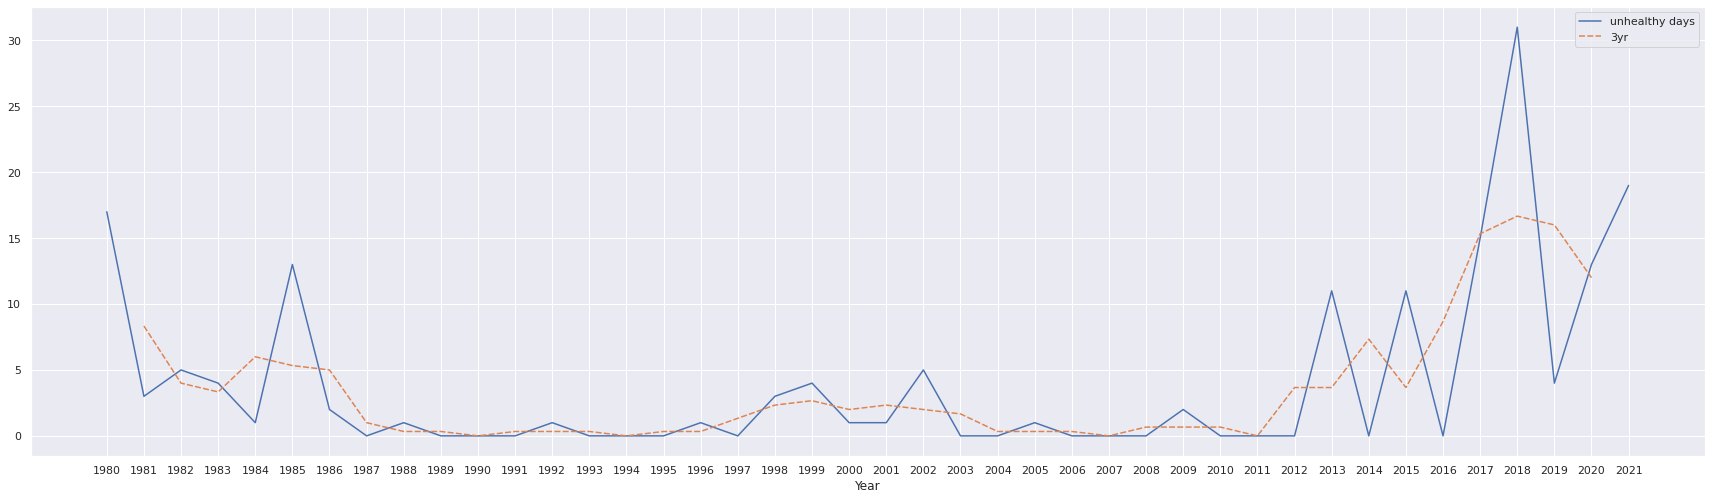

In [ ]:
#visualization package
import seaborn as sns

#set the width to 30 and the heigh to 8.27
sns.set(rc={'figure.figsize':(30,8.27)})

#plot the actual number of unhealthy days and the rolling average number
sns.lineplot(data=reindexed)

After successfully completing the steps above, you should be left with
a plot that you can visually inspect.

**Based on the plot, answer the following question:**

Based on the rolling 3 year mean, has the AQI for the last three years in Jackson county been particularly bad, or is this a normal fluctuation?

According to a visual examination of the plot, and taking into account the relatively short time frame, I believe that there is an increase in unhealthy days, though I would want a longer set of data to verify. It is possible that the activity in the early 1980s represents the tail end of a spike in activity.